In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('./data/total.csv')

In [13]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['TARGET'] = df['TARGET'].diff()
df['TARGET'].iloc[0] = 0

In [14]:
for i in ['EURO_conf','CHINA_conf','ASIA_conf','AMERICA_conf']:
    tmp = "{}".format(i)
    df[tmp] = df[tmp].diff()
    df[tmp].iloc[0] = 0

In [18]:
cols = list(df.columns)
cols.remove('Date')

In [20]:
df[cols] = df[cols].astype(int)

In [21]:
df.head()

,Date,EURO_conf,CHINA_conf,ASIA_conf,AMERICA_conf,EURO_roam,CHINA_roam,ASIA_roam,AMERICA_roam,TARGET
0,2020-01-22,0,0,0,0,1955,3014,8946,701,0
1,2020-01-23,0,95,4,0,1913,2677,7924,943,0
2,2020-01-24,2,277,6,1,2286,2197,7356,864,1
3,2020-01-25,1,486,2,0,1472,1825,7518,828,0
4,2020-01-26,0,669,5,3,1932,3252,11149,900,1


In [110]:
sns.heatmap(df.corr(), cmap='')

ValueError: Colormap  is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [23]:
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)

In [29]:
plt.style.use('ggplot')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000267B18993C8>,
      dtype=object)

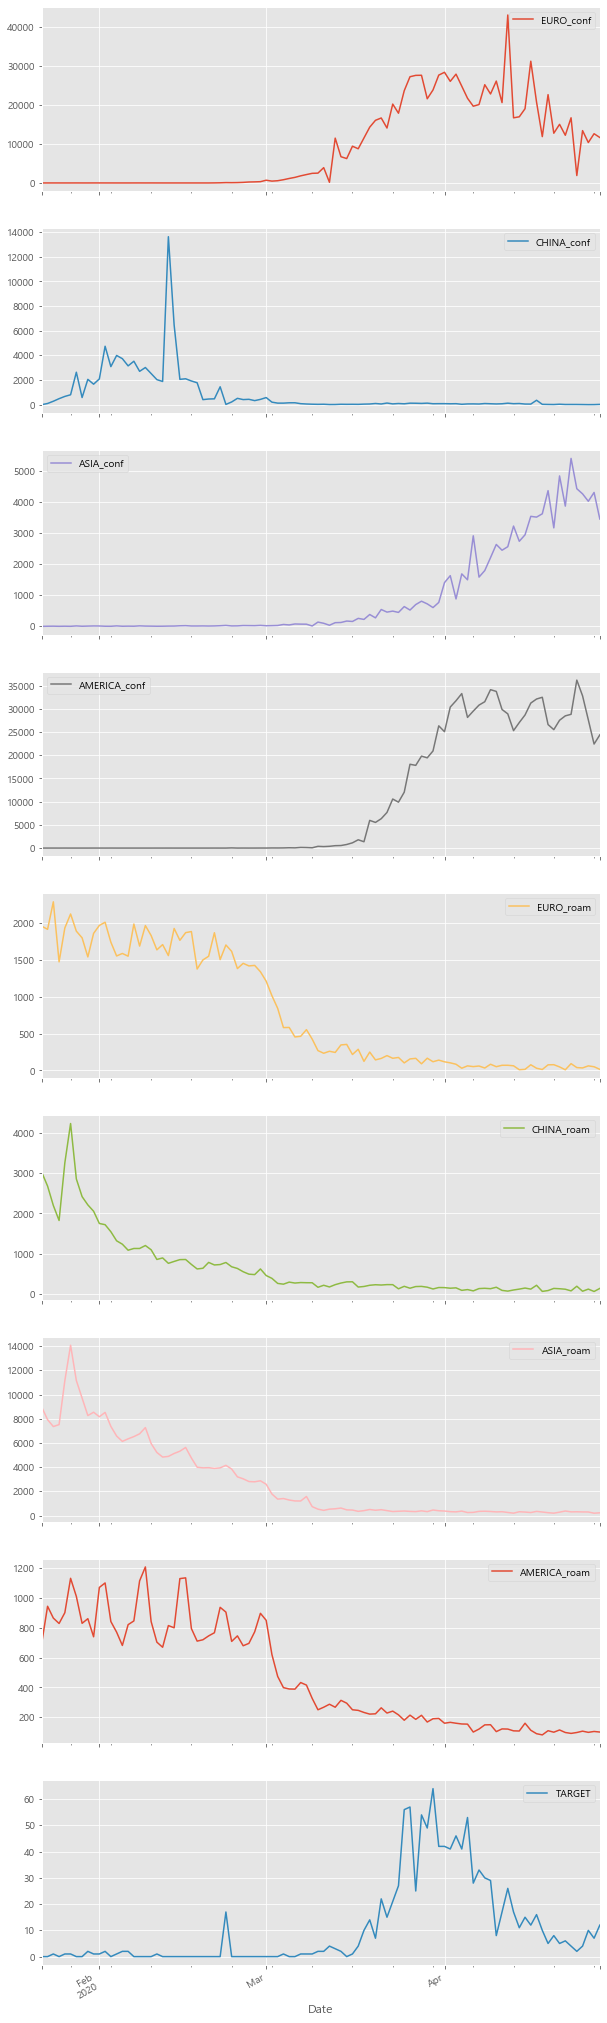

In [32]:
df.plot(subplots=True, figsize=(10,40))

In [34]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [56]:
X.iloc[:]

,EURO_conf,CHINA_conf,ASIA_conf,AMERICA_conf,EURO_roam,CHINA_roam,ASIA_roam,AMERICA_roam
Date,,,,,,,,
2020-01-22,0,0,0,0,1955,3014,8946,701
2020-01-23,0,95,4,0,1913,2677,7924,943
2020-01-24,2,277,6,1,2286,2197,7356,864
2020-01-25,1,486,2,0,1472,1825,7518,828
2020-01-26,0,669,5,3,1932,3252,11149,900
...,...,...,...,...,...,...,...,...
2020-04-24,1900,15,4431,36188,39,197,311,99
2020-04-25,13407,10,4266,32796,34,73,298,108
2020-04-26,10354,3,4027,27631,62,126,294,100


In [57]:
X_train = X.iloc[:69]
y_train = y.iloc[:69]

X_test = X.iloc[69:]
y_test = y.iloc[69:]

In [40]:
X.__len__() - 29

69

In [60]:
from sklearn.ensemble.forest import RandomForestRegressor

In [68]:
# build our RF model
RF_Model = RandomForestRegressor(n_estimators=100,
                                 max_features=1, oob_score=True)

# let's get the labels and features in order to run our 
# model fitting
labels = y_train
features = X_train

# Fit the RF model with features and labels.
rgr=RF_Model.fit(features, labels)

In [84]:
# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    rgr.predict(X_test)).rename(
    columns={0:'predicted_price'})
X_train_predict=pd.DataFrame(
    rgr.predict(X_train)).rename(
    columns={0:'predicted_price'})

# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

In [85]:
RF_predict.set_index(pd.to_datetime(df.index, format='%Y%m%d'), inplace=True)

In [87]:
RF_predict

,predicted_price,diff
Date,,
2020-01-22,1.39,1.39
2020-01-23,1.15,1.15
2020-01-24,0.88,-0.12
2020-01-25,0.16,0.16
2020-01-26,0.93,-0.07
...,...,...
2020-04-24,42.65,40.65
2020-04-25,44.13,40.13
2020-04-26,44.02,34.02


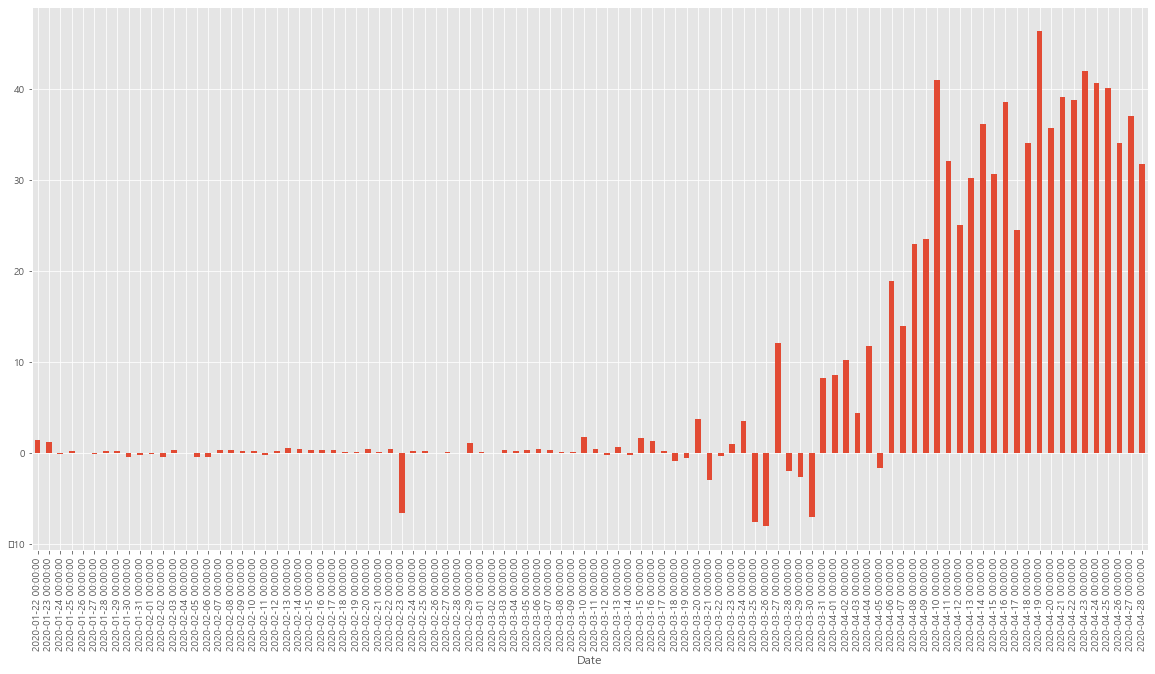

In [93]:
RF_predict['diff']=RF_predict.predicted_price - df.TARGET
RF_predict['diff'].plot(kind='bar')

In [97]:
y_train

Date
2020-01-22     0
2020-01-23     0
2020-01-24     1
2020-01-25     0
2020-01-26     1
              ..
2020-03-26    57
2020-03-27    25
2020-03-28    54
2020-03-29    49
2020-03-30    64
Name: TARGET, Length: 69, dtype: int32

In [98]:
from sklearn.metrics import r2_score
RSquared = r2_score(y_train, X_train_predict.values)

In [99]:
RSquared

0.9728108446198419